In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

## Settings

In [3]:
savefig = True
output_dir = "../figs/review"

## Load averaged simulation results

In [4]:
bin_path = "../analysis/2021-02-10_seasonality"

In [5]:
# LOAD PREVALENCE AND DIVERSITY
print("Loading prevalence and diversity data.")
ops_mean = pd.read_csv(bin_path + "/ops_mean.csv")
ops_std = pd.read_csv(bin_path + "/ops_stds.csv")
ops_se = pd.read_csv(bin_path + "/ops_se.csv")
ogs_mean = pd.read_csv(bin_path + "/ogs_mean.csv")
ogs_std = pd.read_csv(bin_path + "/ogs_stds.csv")
ogs_se = pd.read_csv(bin_path + "/ogs_se.csv")
epoch_df = pd.read_csv(bin_path + "/epoch_df.csv")
epoch_df.index = epoch_df.name

Loading prevalence and diversity data.


In [6]:
ots_mu = pd.merge(ops_mean, ogs_mean, on="t0")
ots_se = pd.merge(ops_se, ogs_se, on="t0")

## Prepare for plotting

In [7]:
time_limits = (epoch_df.loc["Wet2009", "t0"], epoch_df.loc["Wet2015", "t0"])

In [8]:
se_alpha=0.25

In [9]:
genetic_names.update({"mean_k": "C.O.I. ($k$)"})

In [10]:
op = ops_mean
op_se = ops_se

In [11]:
og = ogs_mean
og_se = ogs_se

## Plot

In [12]:
time_limits = (epoch_df.loc["Wet2010", "t0"], epoch_df.loc["Wet2015", "t0"])

### Prevalence

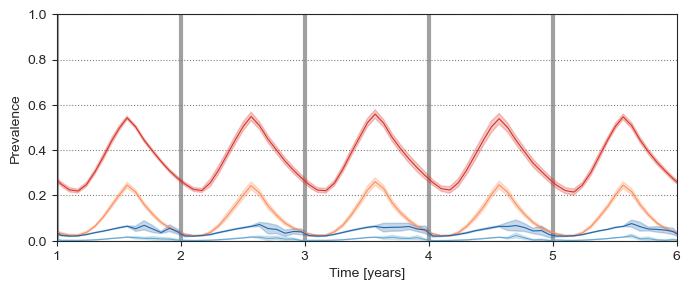

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

prevalence_trajectory_average_plot(ots_mu, ots_se, epoch_df, ax,
                                    col_dt=prevalence_col_dt,
                                   norm_t0=("Wet2009", "t0"),
                                   indicate_epochs=[("Wet20%02d" % y, "t0") for y in np.arange(9, 15)],
                                   indicate_equilibriums=None,
                                   time_limits=time_limits,
                                   years_per_major_tick=1)

ax.set_xlabel("Time [years]")
ax.set_ylabel("Prevalence")
#ax.legend(loc="upper left", ncol=2)
ax.grid(axis='y', linestyle='dotted', color='grey', which='major')

if savefig:
    fig.savefig(os.path.join(output_dir, "sec4_trajectory-prevalence.png"), bbox_inches="tight", pad_inches=0.5)
    fig.savefig(os.path.join(output_dir, "sec4_trajectory-prevalence.pdf"), bbox_inches="tight", pad_inches=0.5)

### Focus genetic diversity statistics

In [14]:
metrics = ["mean_k", "pi", "f_ibd"]
n_metrics = len(metrics)

/anaconda2/envs/dream/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/anaconda2/envs/dream/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/anaconda2/envs/dream/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


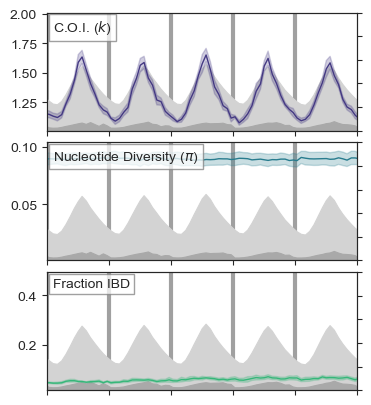

In [15]:
fig, axes = plt.subplots(n_metrics, 1, figsize=(4, 5), sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for ax, metric in zip(axes.flatten(), metrics):
    
    # Averaged
    genetic_trajectory_average_plot(metric, ots_mu, ots_se, epoch_df,
                                    tight_metric_col_dt[metric], ax,
                                    norm_t0=("Wet2009", "t0"),
                                    indicate_epochs=[("Wet20%02d" % y, "t0") for y in np.arange(9, 15)],
                                    time_limits=time_limits,
                                    years_per_major_tick=1)

    # y
    ax.annotate(s=genetic_names[metric], xy=(0.02, 0.95), xycoords="axes fraction", 
                ha="left", va="top",
                bbox=dict(boxstyle="square", fc="white", ec="grey", lw=1, alpha=0.75))
    
    if metric in ["avg_l_ibd", "avg_n_ibd"]:
        ax.set_xlabel("Time [years]")
    else:
        ax.set_xticklabels("")
    
if savefig:
    fig.savefig(os.path.join(output_dir, "sec4_seasons-avg-genetics-focus.png"), bbox_inches="tight", pad_inches=0.5)
    fig.savefig(os.path.join(output_dir, "sec4_seasons-avg-genetics-focus.pdf"), bbox_inches="tight", pad_inches=0.5)

## All genetic diversity statistics

In [16]:
metrics = tight_metrics
n_metrics = len(metrics)

/anaconda2/envs/dream/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/anaconda2/envs/dream/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/anaconda2/envs/dream/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/anaconda2/envs/dream/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases lat

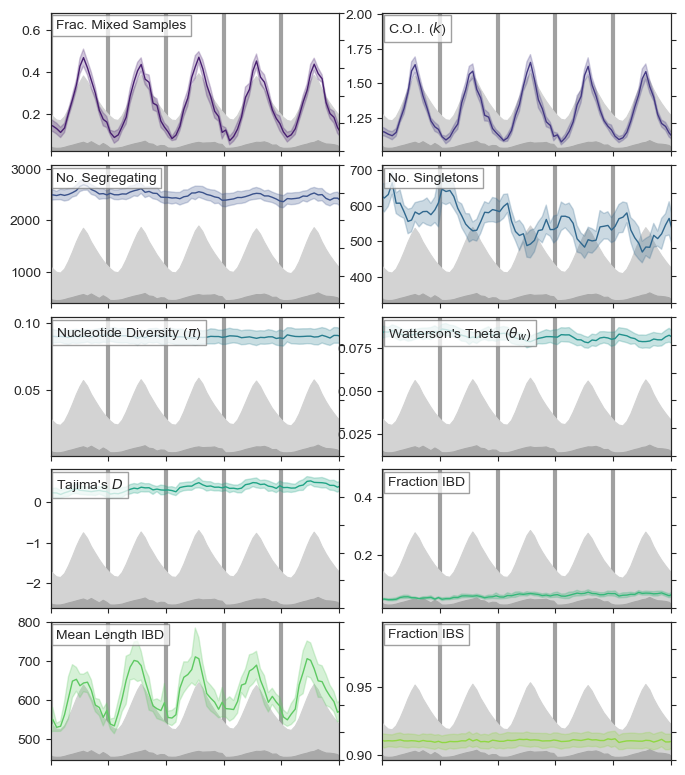

In [17]:
fig, axes = plt.subplots(int(n_metrics/2), 2, figsize=(8, n_metrics*0.9), sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

fig.subplots_adjust(hspace=0.1, wspace=0.15)

for ax, metric in zip(axes.flatten(), metrics):
    
    # Averaged
    genetic_trajectory_average_plot(metric, ots_mu, ots_se, epoch_df,
                                    tight_metric_col_dt[metric], ax,
                                    norm_t0=("Wet2009", "t0"),
                                    indicate_epochs=[("Wet20%02d" % y, "t0") for y in np.arange(9, 15)],
                                    time_limits=time_limits,
                                    years_per_major_tick=1)

    # y
    ax.annotate(s=genetic_names[metric], xy=(0.02, 0.95), xycoords="axes fraction", 
                ha="left", va="top",
                bbox=dict(boxstyle="square", fc="white", ec="grey", lw=1, alpha=0.75))
    
    if metric in ["avg_l_ibd", "avg_n_ibd"]:
        ax.set_xlabel("Time [years]")
    else:
        ax.set_xticklabels("")
    
if savefig:
    fig.savefig(os.path.join(output_dir, "sec4_seasons-avg-genetics-sm.png"), bbox_inches="tight", pad_inches=0.5)
    fig.savefig(os.path.join(output_dir, "sec4_seasons-avg-genetics-sm.pdf"), bbox_inches="tight", pad_inches=0.5)